In [1176]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
import json

In [1177]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrcra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mrcra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mrcra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mrcra\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrcra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1178]:
def read_text(file_dir):
    with open(file_dir) as f:
        lines = f.readlines()
        lines = ''.join(lines)
        lines = lines.replace('\n', ' ')
    return lines

In [1179]:
def preprocessing(text):
    cleaned_text = re.sub("(\.)|(\d+:\d+:\d+,\d+ --> \d+:\d+:\d+,\d+)|(\d+)", " ", text)
    cleaned_text = re.sub("\d", " ", cleaned_text)
    cleaned_text = re.sub("[\"\,\\!\-\?]", " ", cleaned_text[4:-1])
    cleaned_text = re.sub(" +", " ", cleaned_text)
    cleaned_text = cleaned_text.strip()
    cleaned_text = cleaned_text.lower()

    # specific
    cleaned_text = re.sub(r"won\'t", "will not", cleaned_text)
    cleaned_text = re.sub(r"can\'t", "can not", cleaned_text)

    # general
    cleaned_text = re.sub(r"n\'t", " not", cleaned_text)
    cleaned_text = re.sub(r"\'re", " are", cleaned_text)
    cleaned_text = re.sub(r"\'s", " is", cleaned_text)
    cleaned_text = re.sub(r"\'d", " would", cleaned_text)
    cleaned_text = re.sub(r"\'ll", " will", cleaned_text)
    cleaned_text = re.sub(r"\'t", " not", cleaned_text)
    cleaned_text = re.sub(r"\'ve", " have", cleaned_text)
    cleaned_text = re.sub(r"\'m", " am", cleaned_text)
    print(cleaned_text)
    return cleaned_text

In [1180]:
batman_text = read_text('subtitle/batman_text.txt')
batman_cleaned_text = preprocessing(batman_text)

three of a kind let is do this that is it three guys two guys on the roof every guy gets a share five shares is plenty six shares do not forget the guy who planned the job he thinks he can sit it out and still take a slice i know why they call him the joker why do they call him the joker i heard he wears makeup makeup yeah to scare people you know war paint all right everybody hands up heads down i said hands up heads down let is go pal i am making a withdrawal here i said hands up no here comes the silent alarm and there it goes heads down all right tootsie you are taking a dive with me down i said stay down there do not hurt me funny it did not dial it was trying to reach a private number is it a problem no i am done here sit down down down i said stay down there obviously we do not want you doing anything with your hands other than holding on for dear life on the ground stay on the ground nobody make a move nobody stay down yeah you have any idea who you are stealing from you and yo

In [1181]:
dunkirk_text = read_text('subtitle/dunkirk_text.txt')
dunkirk_cleaned_text = preprocessing(dunkirk_text)

english i am english it is grenadiers mate make way out of the way go go go along the mole all the way the ship is about to leave along the mole all the way the ship is about to leave where is the bloody air force the navy is requisitioned her they will be back in an hour my dad wants to be ready before then they have told us to strip her and load those life jackets some men across the channel at dunkirk need taking off some men check fuel fortis and gallons gallons fortis leader stay down at feet to leave fuel for minute fighting time over dunkirk understood vector angels point five and keep an eye on that gauge even when it gets lively save enough to get back no french soldiers no french soldiers no no no french english only english only past this point no it is a british ship no you have your own ships get back get back no you have got your own ships this is a british ship no get back look get the stretchers through there are stretchers coming get out of the way out of the way go go

In [1182]:
interstellar_text = read_text('subtitle/interstellar_text.txt')
interstellar_cleaned_text = preprocessing(interstellar_text)

well my dad was a farmer like everybody else back then of course he did not start that way computer says you are too tight nah i got this crossing the straights shutting it down cooper no shutting it all down no i need power up dad sorry murph go back to bed i thought you were the ghost no there are no such things as ghosts babe grandpa says you can get ghosts maybe that is because grandpa is close to being one himself back to bed were you dreaming about the crash get your butt back in bed murph the wheat had died the blight came and we had to burn it and we still had corn we had acres of corn but mostly we had dust i guess i can not describe it it was just constant just that steady blow of dirt we wore little strips of sheet sometimes over our nose and mouth so that we would not breathe so much of it when we set the table we always set the plate upside down glasses or cups whatever it was upside down shake a leg murph get a move on tom : today you and me in the barn herbicide resistan

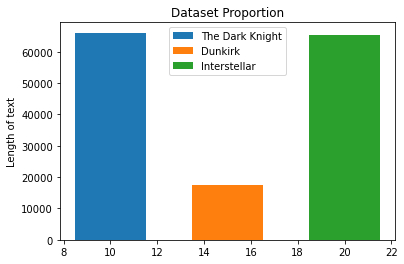

In [1183]:
plt.bar(10,len(batman_cleaned_text),3, label="The Dark Knight")
plt.bar(15,len(dunkirk_cleaned_text),3, label="Dunkirk")
plt.bar(20,len(interstellar_cleaned_text),3, label="Interstellar")
plt.legend()
plt.ylabel('Length of text')
plt.title('Dataset Proportion')
plt.show()

In [1184]:
len(batman_cleaned_text) + len(dunkirk_cleaned_text) + len(interstellar_cleaned_text)

149125

In [1185]:
corpus_list = {"id": ["The Dark Knight", "Dunkirk", "Interstellar"], "text":[batman_cleaned_text,dunkirk_cleaned_text, interstellar_cleaned_text]}

In [1186]:
corpus_df = pd.DataFrame.from_dict(corpus_list)

In [1187]:
corpus_df

,id,text
0,The Dark Knight,three of a kind let is do this that is it thre...
1,Dunkirk,english i am english it is grenadiers mate mak...
2,Interstellar,well my dad was a farmer like everybody else b...


# Top words before stop word removal
Collect vocabulary count

In [1188]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
X = count_vectorizer.fit_transform(corpus_df['text'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [1189]:
keys = count_vectorizer.get_feature_names_out()

In [1190]:
vocab_arr = X.toarray()
vocab_arr

array([[0, 0, 1, ..., 1, 0, 1],
       [5, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int64)

Store the vocab and counts in a pandas dataframe

In [1191]:
# list to store the vocab and counts
vocab = []
count = []

for word in range(len(keys)):
    counter = 0
    for document in range(len(vocab_arr)):
        counter += vocab_arr[document][word]
    vocab.append(keys[word])
    count.append(counter)
    print(keys[word], counter)

abandon 5
abandoned 1
abducted 1
able 6
aboard 1
about 104
above 4
absolute 1
absolutely 2
abundantly 1
accent 1
accept 2
access 3
accessed 1
accident 2
accidentally 2
accomplice 2
according 1
accountant 1
accused 1
ace 1
achieved 1
acquire 1
acres 1
across 7
act 2
activated 1
active 1
actually 6
adapt 2
additional 1
addresses 1
administration 1
admiral 1
admissions 1
admitted 1
admitting 1
adrift 1
advanced 1
advised 1
aerodynamics 1
affairs 2
affirmative 1
afford 3
afield 1
afraid 10
after 32
afternoon 2
afterwards 1
again 21
against 11
age 7
agencies 1
agent 2
aggravated 1
aggressive 1
agile 1
ago 12
agonizing 1
agree 1
agreed 2
agriculture 1
aground 1
ah 5
ahead 5
ahem 1
ai 4
aim 3
aimed 1
air 13
airlock 3
airplane 1
alarm 2
alfred 10
alias 1
alibi 1
alive 9
alkali 1
all 153
allow 4
allowed 1
allows 1
almost 9
alone 9
along 10
alpha 1
already 8
also 1
although 1
altitude 2
aluminum 1
always 13
am 203
amazing 1
ambush 1
amelia 6
amen 1
american 1
ammonia 4
ammonium 1
amount 2
an 52


In [1192]:
# store the count in pandas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [1193]:
vocab_bef_stem

you           1129
the           1062
is            1000
to             741
not            625
              ... 
hurts            1
hurting          1
hurricanes       1
huge             1
zeroing          1
Length: 3402, dtype: int64

<AxesSubplot:>

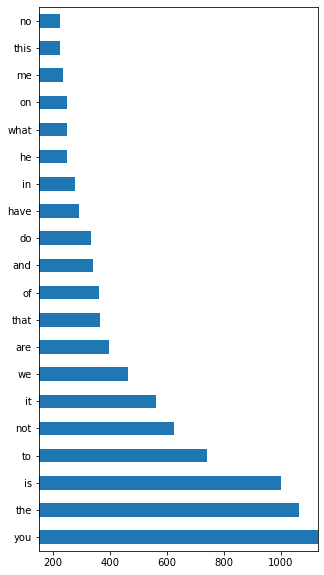

In [1194]:
# Bar plot of top words before stop word removal
top_vocab = vocab_bef_stem.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,10), xlim= (150, 1129))

# Top words after lemmatization

In [1195]:
# Define function to lemmatize each word with its POS tag

# POS_TAGGER_FUNCTION : TYPE 1
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None


In [1196]:
vocab_bef_stem

# ubah ke lemmanya

# yang lemmanya sama count nya disum atau ditambah
lemmatizer = WordNetLemmatizer()
print("youll:", lemmatizer.lemmatize("you'll"))

st = LancasterStemmer()
print("youll:", st.stem("youll"))

youll: you'll
youll: youl


In [1197]:
vocab_bef_stem.keys()

vocab = []
counter = []
i = 0
for word in vocab_bef_stem.keys():
    pos_tagged = nltk.pos_tag([word])
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    for tagged_word, tag in wordnet_tagged:
        if tag is None:
            # if there is no available tag, append the token as is
            vocab.append(tagged_word)
            counter.append(vocab_bef_stem[word])
        else:
            # else use the tag to lemmatize the token
            vocab.append(lemmatizer.lemmatize(tagged_word, tag))
            counter.append(vocab_bef_stem[word])
        print(tagged_word, tag)
        print(word)
        print(vocab[i], counter[i])
        i = i+1
    # vocab.append(lemmatizer.lemmatize(word))

you None
you
you 1129
the None
the
the 1062
is v
is
be 1000
to None
to
to 741
not r
not
not 625
it None
it
it 563
we None
we
we 464
are v
are
be 398
that None
that
that 364
of None
of
of 361
and None
and
and 339
do v
do
do 335
have v
have
have 291
in None
in
in 276
he None
he
he 249
what None
what
what 249
on None
on
on 249
me None
me
me 234
this None
this
this 226
no None
no
no 226
for None
for
for 226
am v
am
be 203
will None
will
will 203
they None
they
they 196
can None
can
can 193
your None
your
your 190
be v
be
be 174
but None
but
but 162
know v
know
know 160
get v
get
get 157
there r
there
there 157
all None
all
all 153
my None
my
my 152
go v
go
go 152
was v
was
be 145
with None
with
with 140
one None
one
one 135
here r
here
here 134
out None
out
out 132
just r
just
just 126
him None
him
him 122
back r
back
back 120
would None
would
would 118
right n
right
right 118
us None
us
us 115
up r
up
up 113
down r
down
down 110
so r
so
so 109
come v
come
come 108
about None
about
about 1

In [1198]:
vocab_dictionary = {'token': [], 'count': []}
for word_index in range(len(vocab)):
    if vocab[word_index] in vocab_dictionary['token']:
        index = vocab_dictionary['token'].index(vocab[word_index])
        vocab_dictionary['count'][index] = vocab_dictionary['count'][index]+counter[word_index]
        print(vocab[word_index], 'is in ', vocab_dictionary['token'][index])
    else:
        vocab_dictionary['token'].append(vocab[word_index])
        vocab_dictionary['count'].append(counter[word_index])

be is in  be
be is in  be
be is in  be
be is in  be
do is in  do
get is in  get
be is in  be
go is in  go
have is in  have
come is in  come
do is in  do
be is in  be
have is in  have
do is in  do
say is in  say
thing is in  thing
get is in  get
do is in  do
make is in  make
guy is in  guy
well is in  well
come is in  come
need is in  need
be is in  be
try is in  try
want is in  want
take is in  take
take is in  take
say is in  say
go is in  go
talk is in  talk
look is in  look
make is in  make
die is in  die
year is in  year
kill is in  kill
minute is in  minute
start is in  start
head is in  head
friend is in  friend
leave is in  leave
call is in  call
happen is in  happen
make is in  make
take is in  take
get is in  get
go is in  go
work is in  work
give is in  give
come is in  come
see is in  see
look is in  look
head is in  head
hour is in  hour
need is in  need
move is in  move
tell is in  tell
hold is in  hold
set is in  set
mean is in  mean
cop is in  cop
unit is in  unit
engine

In [1199]:
vocab_dictionary

{'token': ['you',
  'the',
  'be',
  'to',
  'not',
  'it',
  'we',
  'that',
  'of',
  'and',
  'do',
  'have',
  'in',
  'he',
  'what',
  'on',
  'me',
  'this',
  'no',
  'for',
  'will',
  'they',
  'can',
  'your',
  'but',
  'know',
  'get',
  'there',
  'all',
  'my',
  'go',
  'with',
  'one',
  'here',
  'out',
  'just',
  'him',
  'back',
  'would',
  'right',
  'us',
  'up',
  'down',
  'so',
  'come',
  'about',
  'if',
  'at',
  'like',
  'now',
  'how',
  'them',
  'gonna',
  'let',
  'as',
  'time',
  'murph',
  'why',
  'harvey',
  'yeah',
  'where',
  'our',
  'she',
  'cooper',
  'need',
  'well',
  'okay',
  'take',
  'when',
  'from',
  'want',
  'people',
  'could',
  'her',
  'good',
  'off',
  'who',
  'think',
  'look',
  'see',
  'tell',
  'make',
  'then',
  'an',
  'his',
  'dent',
  'because',
  'their',
  'dad',
  'mr',
  'should',
  'some',
  'way',
  'batman',
  'or',
  'more',
  'wanna',
  'by',
  'brand',
  'find',
  'something',
  'give',
  'year',
  

In [1200]:
len(vocab) == len(counter)

True

## Sum identical lemma

In [1201]:
# store the count in pandas dataframe with vocab as index
vocab_aft_lemmtag = pd.DataFrame.from_dict(data=vocab_dictionary)
# sort the dataframe
# vocab_aft_lemmtag = vocab_aft_lemmtag.sort_values(ascending=False, by=count)
# vocab_aft_lemmtag
top_vocab = vocab_aft_lemmtag.sort_values(by=['count'], ascending=False)

<AxesSubplot:ylabel='token'>

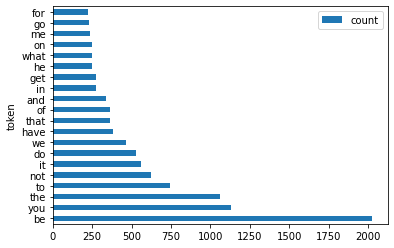

In [1202]:
top_vocab = top_vocab.head(20)
top_vocab.plot.barh(x='token', y='count')

In [1203]:
vocab_aft_lemmtag.head()

,token,count
0,you,1129
1,the,1062
2,be,2022
3,to,741
4,not,625


# Top words after stop word removal


In [1204]:
def is_stop_word(text):
    if text in stopwords.words('english'):
        return True
    else:
        return False

In [1205]:
for index, row in vocab_aft_lemmtag.iterrows():
    if is_stop_word(row['token']):
        vocab_aft_lemmtag.drop(index, inplace=True)

In [1206]:
vocab_aft_stop_words = vocab_aft_lemmtag

<AxesSubplot:ylabel='token'>

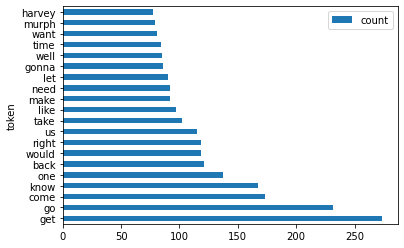

In [1208]:
top_vocab = vocab_aft_stop_words.sort_values(by=['count'], ascending=False).head(20)
top_vocab.plot.barh(x='token', y='count')